<a href="https://colab.research.google.com/github/binibinibini/project2/blob/main/%EB%AA%A8%EB%8D%B8_%ED%8F%89%EA%B0%80_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# 1. Google Drive 마운트
# Colab에서 실행 시, 팝업 창이 나타나면 권한을 허용해주세요.
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("✅ Google Drive 마운트 완료.")
except ImportError:
    print("Google Colab 환경이 아닙니다. 로컬 파일 시스템을 사용합니다.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive 마운트 완료.


In [ ]:
# --- 시각화 한글 폰트 설정 ---
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 2. 파일 경로 설정 및 데이터 로드
# Ground Truth 파일의 경로를 정확히 입력해주세요.
file_path = '/content/drive/MyDrive/ITWILL(중간플젝2)/파인튠드 분류 모델/Ground Truth_최종.csv'
output_dir = '/content/drive/MyDrive/ITWILL(중간플젝2)/파인튠드 분류 모델/Model_test/Model_Analysis_Results5'

# 결과 저장 디렉토리 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    df = pd.read_csv(file_path)
    print(f"\n✅ '{os.path.basename(file_path)}' 파일 로드 성공!")
    print("\n--- 데이터 미리보기 ---")
    print(df.head())
    print("\n--- 데이터 정보 ---")
    df.info()
except FileNotFoundError:
    print(f"❌ 파일을 찾을 수 없습니다: {file_path}")
    raise


# 현재 데이터프레임의 컬럼 이름 출력
print(df.columns)




✅ 'Ground Truth_최종.csv' 파일 로드 성공!

--- 데이터 미리보기 ---
                                                댓글내용  예상 평가자 다수결 기존 모델 top1  \
0  이게 인간의 멸종까지 예상되는 정말 무서운 일인데,\n눈앞에 보이지 않으니 그저 음...  공포      슬픔         공포   
1                         내일 삼겹살 약속 잡게 하네요 넘 맛잇어 보여요  기대      기대         기쁨   
2                        왜 삼촌한테 반말을 하고 고기를 굽게 하시나요?ㅋ  분노      분노         분노   
3  아.... 여기 회사앞인데 알려지면 안되는곳인데............이제 더 기다리...  슬픔      슬픔         기대   
4                                    뭔가 오빠 귀여워졌어요 ㅋㅋ  애정      애정         애정   

  기존 모델 top2 50add 모델 top1 50add 모델 top2  
0         슬픔            공포            분노  
1         애정            기쁨            기대  
2         기대            기쁨            애정  
3         슬픔            슬픔            기대  
4         기쁨            기쁨            애정  

--- 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   댓글내용 


✅ 모든 성능 지표가 '/content/drive/MyDrive/ITWILL(중간플젝2)/파인튠드 분류 모델/Model_test/Model_Analysis_Results5/model_performance_metrics.csv'에 저장되었습니다.


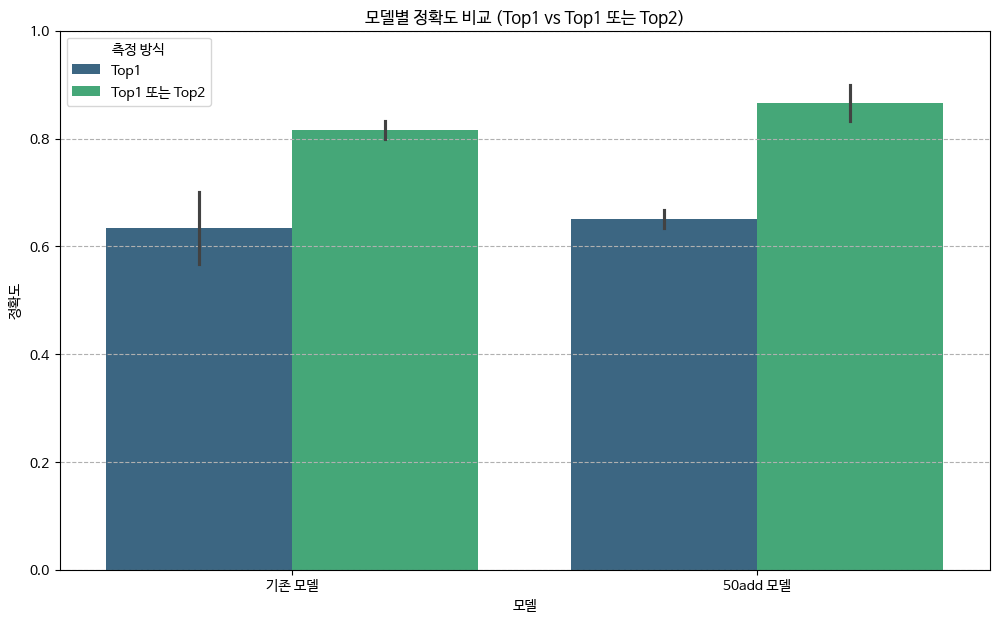

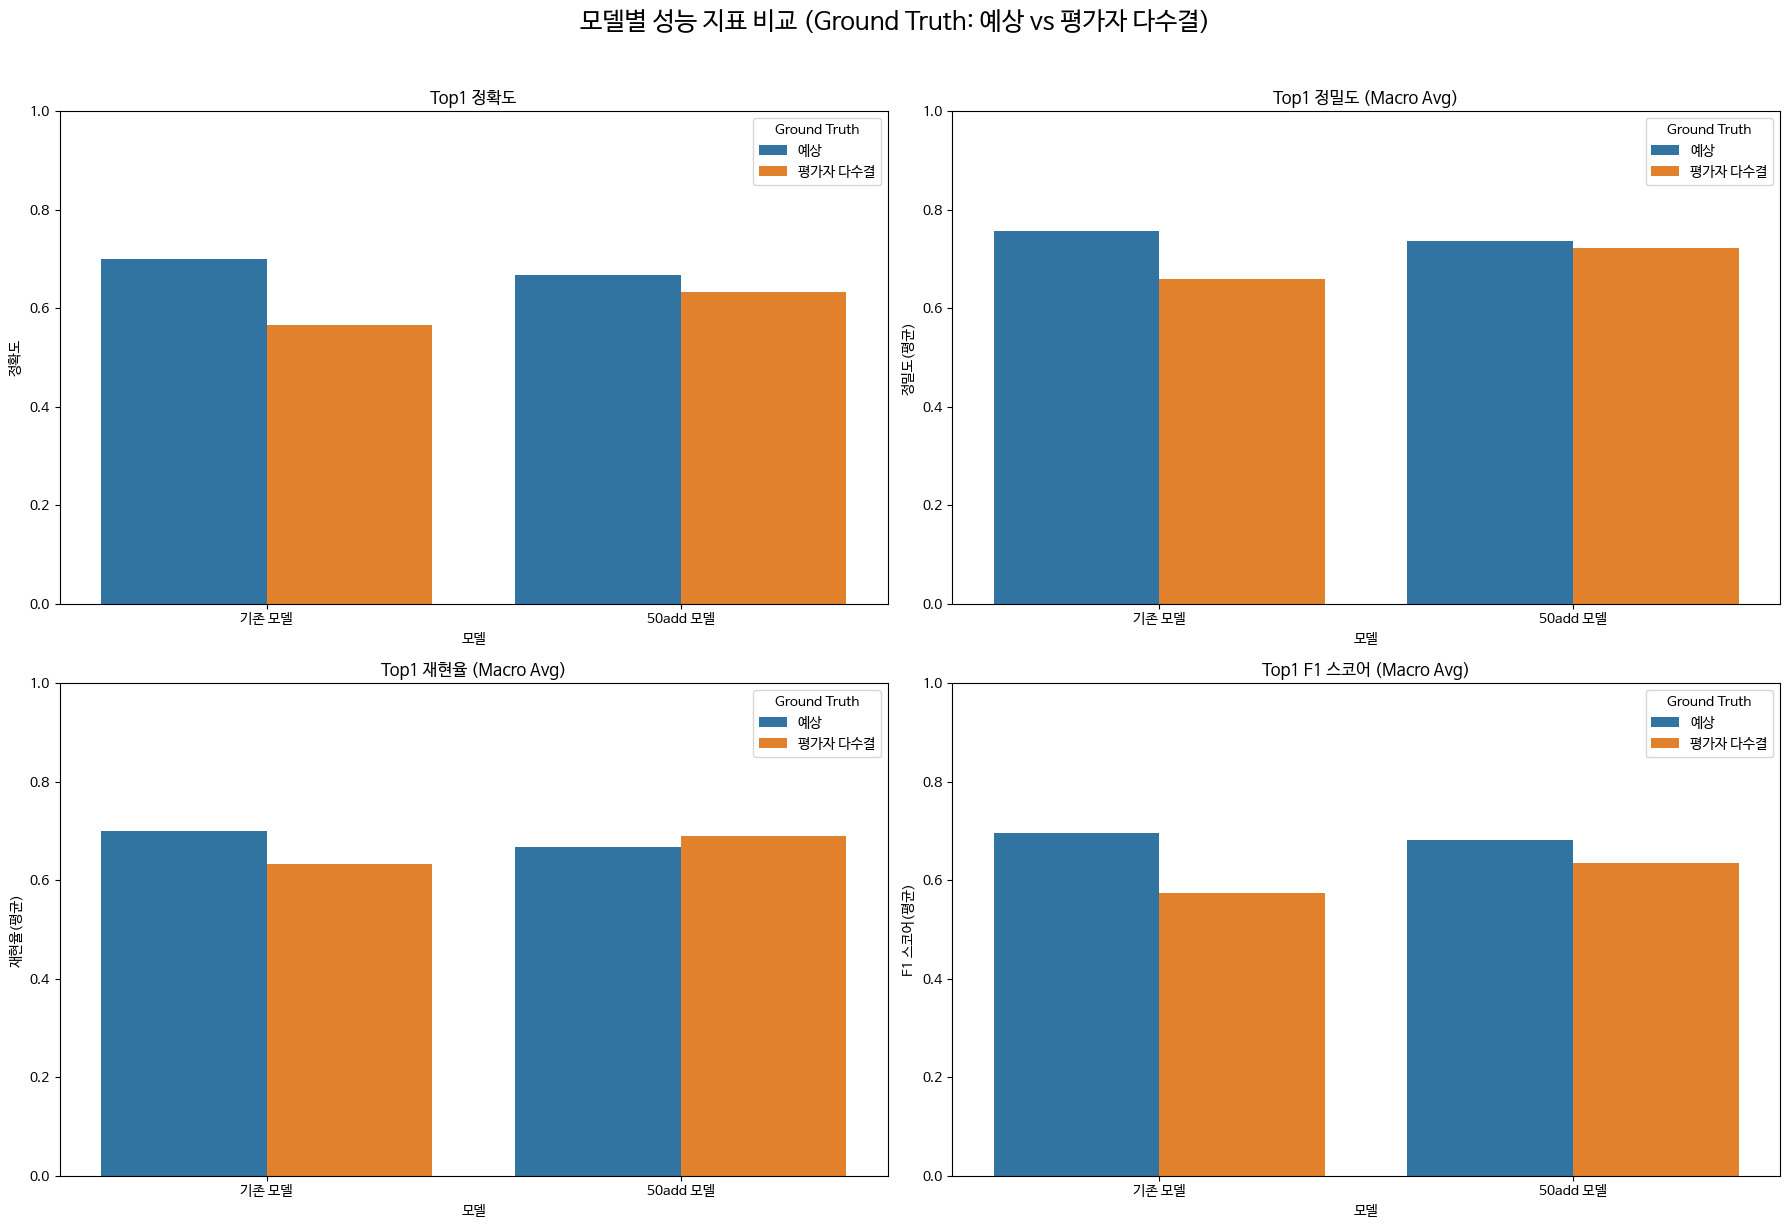

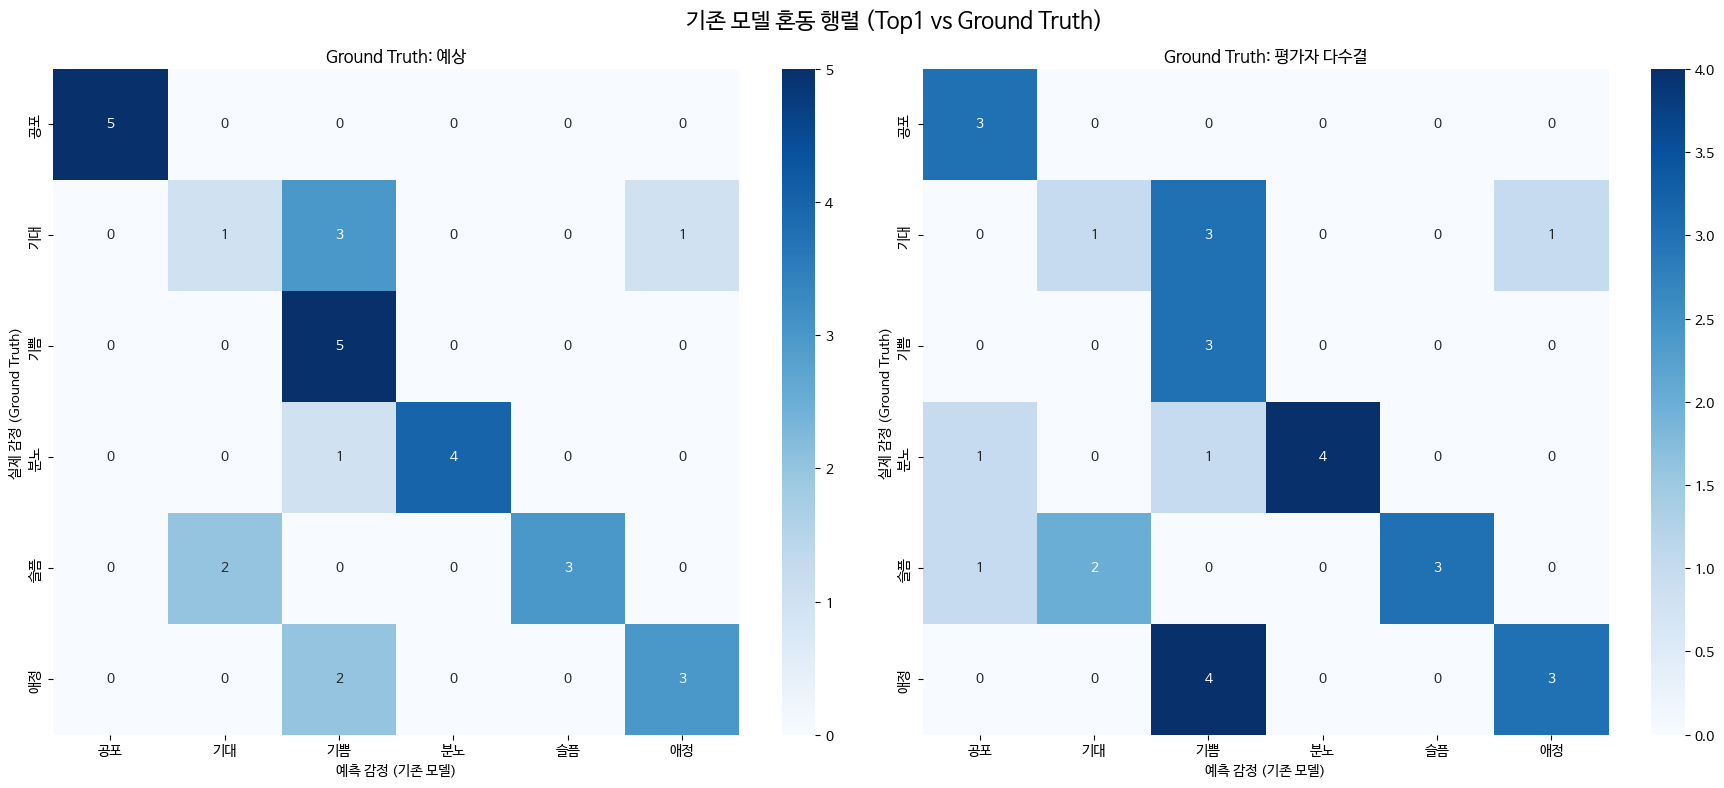

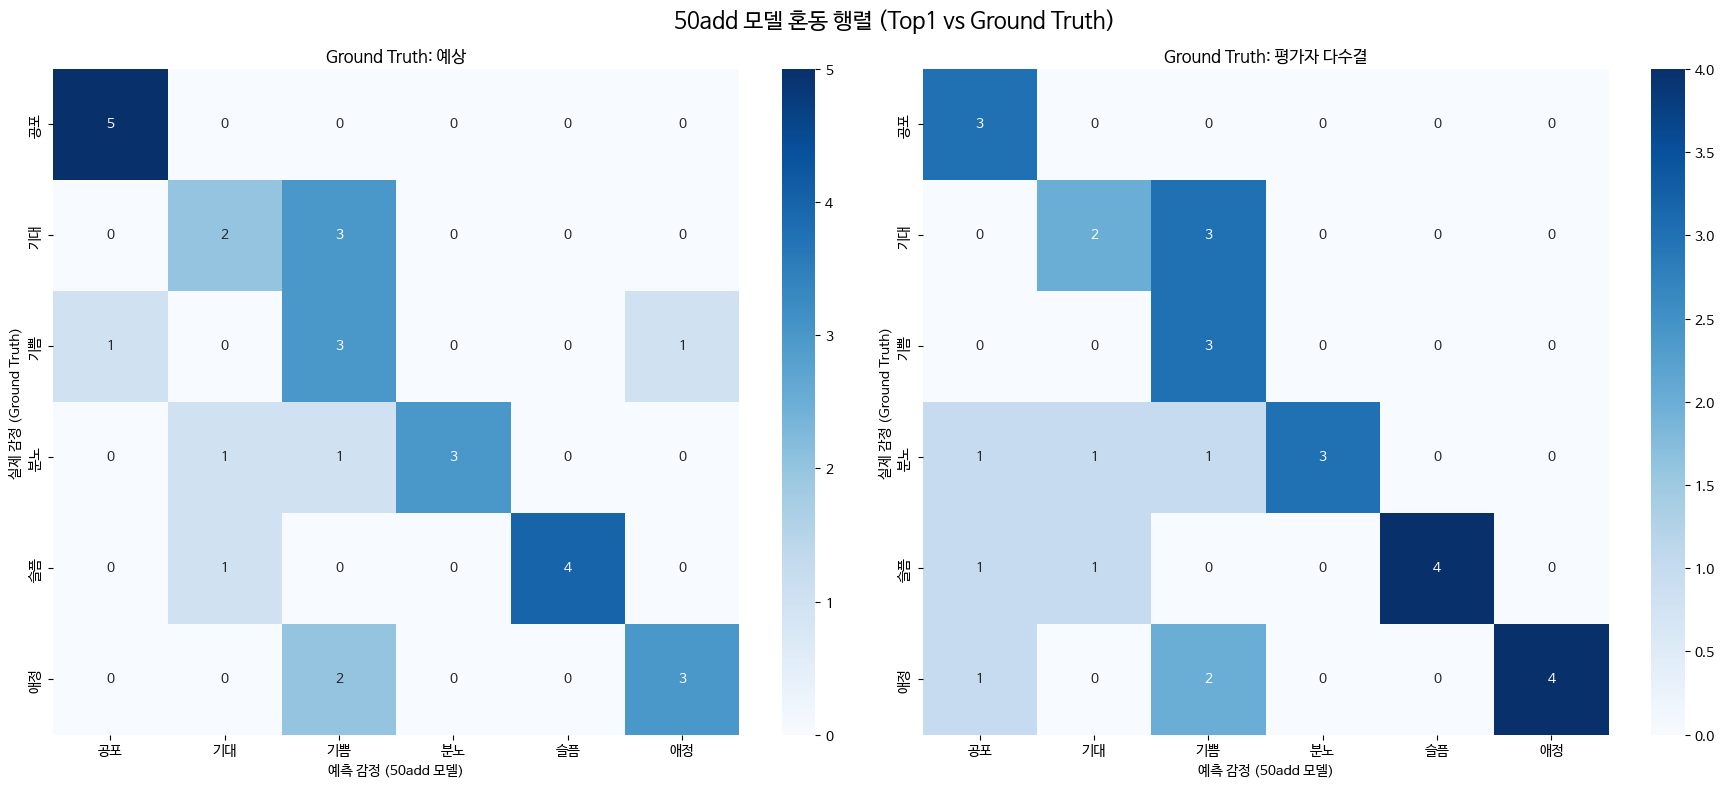

In [ ]:
# 3. 평가 및 결과 저장
gt_cols = {'예상': '예상', '평가자 다수결': '평가자 다수결'}
model_prefixes = ['기존 모델', '50add 모델']
all_metrics_results = []

for gt_name, gt_col in gt_cols.items():
    for model_prefix in model_prefixes:
        pred_top1_col = f'{model_prefix} top1'
        pred_top2_col = f'{model_prefix} top2'

        # 'Top1' 감정만으로 성능 지표 측정
        report_top1 = classification_report(df[gt_col], df[pred_top1_col], output_dict=True, zero_division=0)
        report_top1['accuracy'] = accuracy_score(df[gt_col], df[pred_top1_col])

        # 'Top1 또는 Top2' 감정으로 정확도 측정
        is_correct_top1_or_top2 = ((df[pred_top1_col] == df[gt_col]) | (df[pred_top2_col] == df[gt_col]))
        accuracy_top1_or_top2 = is_correct_top1_or_top2.mean()

        all_metrics_results.append({
            'Ground Truth': gt_name,
            '모델': model_prefix,
            '측정방식': 'Top1',
            '정확도': report_top1['accuracy'],
            '정밀도(평균)': report_top1['macro avg']['precision'],
            '재현율(평균)': report_top1['macro avg']['recall'],
            'F1 스코어(평균)': report_top1['macro avg']['f1-score']
        })
        all_metrics_results.append({
            'Ground Truth': gt_name,
            '모델': model_prefix,
            '측정방식': 'Top1 또는 Top2',
            '정확도': accuracy_top1_or_top2,
            '정밀도(평균)': np.nan,
            '재현율(평균)': np.nan,
            'F1 스코어(평균)': np.nan
        })

metrics_df = pd.DataFrame(all_metrics_results)
metrics_df.to_csv(os.path.join(output_dir, 'model_performance_metrics.csv'), index=False, encoding='utf-8-sig')
print(f"\n✅ 모든 성능 지표가 '{os.path.join(output_dir, 'model_performance_metrics.csv')}'에 저장되었습니다.")

# 4. 모델별 'Top1' vs 'Top1 또는 Top2' 정확도 비교 그래프 시각화 (새롭게 추가된 부분)
plt.figure(figsize=(12, 7))
sns.barplot(x='모델', y='정확도', hue='측정방식', data=metrics_df, palette='viridis')
plt.title('모델별 정확도 비교 (Top1 vs Top1 또는 Top2)')
plt.xlabel('모델')
plt.ylabel('정확도')
plt.ylim(0, 1)
plt.legend(title='측정 방식')
plt.grid(axis='y', linestyle='--')
plt.savefig(os.path.join(output_dir, 'accuracy_top1_vs_top2_comparison.png'))
plt.show()


# 5. 성능 지표 시각화 (정확도, 정밀도, 재현율, F1 스코어)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('모델별 성능 지표 비교 (Ground Truth: 예상 vs 평가자 다수결)', fontsize=18, y=1.02)

sns.barplot(x='모델', y='정확도', hue='Ground Truth', data=metrics_df[metrics_df['측정방식'] == 'Top1'], ax=axes[0, 0])
axes[0, 0].set_title('Top1 정확도')
axes[0, 0].set_ylim(0, 1)

sns.barplot(x='모델', y='정밀도(평균)', hue='Ground Truth', data=metrics_df[metrics_df['측정방식'] == 'Top1'], ax=axes[0, 1])
axes[0, 1].set_title('Top1 정밀도 (Macro Avg)')
axes[0, 1].set_ylim(0, 1)

sns.barplot(x='모델', y='재현율(평균)', hue='Ground Truth', data=metrics_df[metrics_df['측정방식'] == 'Top1'], ax=axes[1, 0])
axes[1, 0].set_title('Top1 재현율 (Macro Avg)')
axes[1, 0].set_ylim(0, 1)

sns.barplot(x='모델', y='F1 스코어(평균)', hue='Ground Truth', data=metrics_df[metrics_df['측정방식'] == 'Top1'], ax=axes[1, 1])
axes[1, 1].set_title('Top1 F1 스코어 (Macro Avg)')
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'performance_metrics_bar_charts.png'))
plt.show()

# 6. 혼동 행렬 시각화 (기존 모델 top1 vs Ground Truth)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle('기존 모델 혼동 행렬 (Top1 vs Ground Truth)', fontsize=16)

for i, (gt_name, gt_col) in enumerate(gt_cols.items()):
    ax = axes[i]
    labels = sorted(df[gt_col].unique())
    cm = confusion_matrix(df[gt_col], df['기존 모델 top1'], labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title(f"Ground Truth: {gt_name}")
    ax.set_xlabel('예측 감정 (기존 모델)')
    ax.set_ylabel('실제 감정 (Ground Truth)')

fig.tight_layout()
plt.savefig(os.path.join(output_dir, 'confusion_matrix_기존모델.png'))
plt.show()

# 7. 혼동 행렬 시각화 (50add 모델 top1 vs Ground Truth)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle('50add 모델 혼동 행렬 (Top1 vs Ground Truth)', fontsize=16)

for i, (gt_name, gt_col) in enumerate(gt_cols.items()):
    ax = axes[i]
    labels = sorted(df[gt_col].unique())
    cm = confusion_matrix(df[gt_col], df['50add 모델 top1'], labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title(f"Ground Truth: {gt_name}")
    ax.set_xlabel('예측 감정 (50add 모델)')
    ax.set_ylabel('실제 감정 (Ground Truth)')

fig.tight_layout()
plt.savefig(os.path.join(output_dir, 'confusion_matrix_50add모델.png'))
plt.show()